In [14]:
cd C:\Users\LIMDAESUN\Desktop\카이스트관련\UIUC\FE1\HappyMeal

C:\Users\LIMDAESUN\Desktop\카이스트관련\UIUC\FE1\HappyMeal


 # 상품특징 
 
 ### ● 전환사채
 ### ● 3년부터 Autocall
 ### ● 전환가격 주당 12
 ### ● 만기 5년
 ### ● 쿠폰 6% semi annual 지급

 ## Forward Difference
\begin{align}
\ \frac{\nu_n^{m+1} - \nu_n^{m}}{\Delta t} - 0.5(r-d)n(\nu_{n+1}^{m} - \nu_{n-1}^m) - 0.5\sigma^2n^2(\nu_{n+1}^m-2\nu_n^m+\nu_{n-1}^m)+r\nu_n^m = 0        \\
\ \\
\end{align}
 ## Backward Difference
\begin{align}
\ \frac{\nu_n^{m+1} - \nu_n^{m}}{\Delta t} - 0.5(r-d)n(\nu_{n+1}^{m+1} - \nu_{n-1}^{m+1}) - 0.5\sigma^2n^2(\nu_{n+1}^{m+1}-2\nu_n^{m+1}+\nu_{n-1}^{m+1})+r\nu_n^{m+1} = 0 \\
\end{align}

 ## Average : 
\begin{align}
\ 0 = \nu_n^{m+1} - \nu_n^{m} - \frac{\Delta t}{4} (r-d) n (\nu_{n+1}^{m+1}-\nu_{n-1}^{m+1} +\nu_{n+1}^{m} -\nu_{n-1}^{m}) + \frac{\Delta t}{2} r(\nu_{n}^{m+1}+\nu_n^m) \\ - \frac{\Delta t}{4} \sigma^2 n^2 ( \nu_{n+1}^{m+1}-2\nu_n^{m+1}+\nu_{n-1}^{m+1} + \nu_{n+1}^{m} - 2\nu_n^m + \nu_{n-1}^m) \\
\end{align}

 ## Then,
\begin{align}
\ \frac{1}{4} ( \sigma^2 n^2 -(r-d)n ) \nu_{n-1}^{m} + (-\frac{1}{\Delta t}- \frac{1}{2} r - \frac{1}{2}\sigma^2 n^2)\nu_n^m + \frac{1}{4} ((r-d)n + \sigma^2 n^2 )\nu_{n+1}^m \\ =  -\frac{1}{4} (\sigma^2 n^2 -(r-d)n)\nu_{n-1}^{m+1} - (\frac{1}{\Delta t}- \frac{1}{2} r - \frac{1}{2}\sigma^2 n^2)\nu_n^{m+1} - \frac{1}{4}((r-d)n+\sigma^2 n^2 ) \nu_{n+1}^{m+1} \\
\ \\
\end{align}

## Coefficients
\begin{align}
\ \\ 
\ \kappa = \frac{1}{2}(r+\sigma^2 n^2) \\
\ \\ 
\ a_n = \frac{1}{4}(\sigma^2 n^2 - (r-d)n) \\
\ b_n = (-\kappa_n - \frac{1}{dt} )\\
\ c_n = \frac{1}{4}(\sigma^2 n^2 - (r-d)n) \\
\ d_n = -a_n \times V_{n-1}^{m+1} - (b_n + \frac{2}{\Delta t})V_{n}^{m+1} -c_n \times V_{n+1}^{m+1} \\
\ a_n V_{n-1}^{m} + b_n V_{n}^{m} + c_n V_{n+1}^{m} = -a_n V_{n-1}^{m+1} - (b_n + \frac{2}{\Delta t} ) V_{n}^{m+1} - c_n V_{n+1}^{m+1}\\
\end{align}
## Smoothing boundary at t
\begin{align}
\ V_{-1} = 2V_{0} - V_{1}  \\ \ V_{N+1}= 2V_N-V_{N-1} \\ \ d_0^m = (-2 \bullet a_0-b_0-\frac{2}{dt}) V_0 + (a_0-c_0) V_{1} \\
\ d_N^m = (c_N-a_N)V_{N-1} + (-2\bullet c_N-b_N-\frac{2}{dt})V_{N}\\
\end{align}

$$\begin{bmatrix} b_0 + 2a_0 & c_0-a_0 & 0 & 0& ... & 0& 0 & 0\\ a_1 & b_1 & c_1& 0& ...& 0 & 0& 0 \\ 0 & a_2 & b_2& c_2& ...& 0 & 0& 0\\ 0 & 0 & a_3& b_3& ...& 0& 0& 0\\ ... & ... & ...& ...& ...& 0& 0& 0\\ 0 & 0 & 0& 0& ...& a_{N-1} & b_{N-1}& c_{N-1}\\ 0 & 0 & 0& 0& 0& 0& a_{N}-c_{N}& b_{N}+2c_{N} \end{bmatrix} \begin{bmatrix} v_0^{m} \\ v_1^{m} \\ v_2^{m}\\ ...\\ ...\\ v_{N-1}^{m}\\ v_{N}^{m}\end{bmatrix} = \begin{bmatrix} d_0^{m+1} \\ d_1^{m+1} \\ d_2^{m+1}\\ ...\\ ...\\ d_{N-1}^{m+1}\\ d_{N}^{m+1}\end{bmatrix}$$ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.stats import norm
import datetime
import dateutil.relativedelta as relativedelta

In [2]:
inv = np.linalg.inv
today = datetime.datetime(2012,8,20)
Autocall_start_date = datetime.datetime(2015,9,1)
Autocall_start_M = int((Autocall_start_date - today).days/7)
Barrier_Autocall = 16

In [5]:
today,Autocall_start_date

(datetime.datetime(2012, 8, 20, 0, 0), datetime.datetime(2015, 9, 1, 0, 0))

In [17]:
S,K,T = 10 , 12, 5
w = 2
N = 250
r = 0.01
Div_S = 0.05
C_rate = 0.06
F = 1000
compound = 0.5 
dt = 1/52
Coupon_date = np.arange(0.5,T+0.5,0.5).round(4)

In [18]:
def CB_price(S,K,T,r, w, Div_S , N ,dt, C_rate, Coupon_date, Barrier_Autocall , S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = False, today = False) :
    
    S_max_times ,S_min_times = S_max_times ,S_min_times
    S_max , S_min = S_max_times * S , S_min_times*S
    
    
    n = np.arange(0,N+1)
    dS = (S_max - S_min)/N
    S_range = n * dS
    sigma = w/(np.sqrt(S_range)+0.0000001)
    
    
    Timeline = np.arange(0,T+dt, dt).round(4)        
    M = len(Timeline)
    Coupon = F * C_rate * compound
    Number_of_stock = F/K
    Coupon_date_M = ((np.array(Coupon_date)/T)*M).astype(np.int64)
    
    an = 0.25 * (sigma**2 * n**2 - (r-Div_S) * n)
    bn = -0.5 * sigma**2 * n**2 - 0.5 * r - 1/dt
    cn = 0.25 * (sigma**2 * n**2 + (r-Div_S) * n)
    a0 , b0 , c0 = an[0], bn[0], cn[0]
    aN , bN, cN = an[-1],bn[-1],cn[-1]
    bn[0] = 2*a0 + b0
    cn[0] = c0-a0
    bn[-1] = bN +2*cN
    an[-1] = aN - cN
    
    k = np.array([an[1:], bn, cn[:-1]])
    offset = [-1,0,1]
    diag = diags(k,offset).toarray()
    inv_diag = inv(diag)
    
    value_mat = np.zeros((N+1,M))
    S_mat = (n * dS).reshape(-1,1) * np.ones((N+1,M))
    
    
    value_mat[:,-1] = Coupon + (S_mat[:,-1]>=K) * S_mat[:,-1] * Number_of_stock + (S_mat[:,-1]<K) * F
    value_mat[0,-1] = 0

    for i in range(M-2,-1,-1) :

        V = value_mat[:,i+1]
        d0 = (-2*a0-b0-2/dt) * V[0] + (a0-c0) * V[1]
        d_max = (cN-aN)*V[-2] + (-2*cN-bN-2/dt)*V[-1]
        dn = -an[1:-1] * V[0:-2] - (bn[1:-1] + 2/dt) * V[1:-1] - cn[1:-1] * V[2:]
        d = np.concatenate([[d0],dn,[d_max]]).reshape(-1,1)


        value_mat[:,i] = inv_diag.dot(d).reshape(-1)
        value_mat[0,i] = 0    


        Time_C_to_C = (len(Timeline)/(T/compound))

        if i not in Coupon_date_M and i>Autocall_start_M:

            Accrued_Day = i - (i//Time_C_to_C) * Time_C_to_C
            Accrued_Coupon = Coupon * Accrued_Day/Time_C_to_C
            value_mat[:,i] = ((S_mat[:,i]>=Barrier_Autocall) * S_mat[:,i] * Number_of_stock +
                              (S_mat[:,i]>=Barrier_Autocall) * Accrued_Coupon + 
                              (S_mat[:,i]<Barrier_Autocall) * value_mat[:,i])

        elif i in Coupon_date_M and i>Autocall_start_M :

            value_mat[:,i] = (Coupon *(S_mat[:,i]>0) +
                              (S_mat[:,i]>=Barrier_Autocall) * S_mat[:,i] * Number_of_stock +
                              (S_mat[:,i]<Barrier_Autocall) * value_mat[:,i]) 

        elif i in Coupon_date_M and i < Autocall_start_M :

            value_mat[:,i] = Coupon * (S_mat[:,i]>0) + value_mat[:,i]
    
    if ind == False  or today == False : 
        ind = np.arange(0,len(Timeline))
    else : 
        ind = pd.date_range(today, periods = len(Timeline), freq = 'W-Mon')
    
    Data = pd.DataFrame(value_mat.round(4) , index = S_range.round(4), columns = ind)
    Data.index.name = 'Underlying'
    return Data

In [19]:
def plotting(S,K,T,r, w, Div_S , N ,dt, C_rate, Coupon_date, Barrier_Autocall , S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today) :
    
    Data = CB_price(S= S,K= K, T = T,r=r, w=w, Div_S =Div_S, N=N ,dt=dt, C_rate=C_rate, Coupon_date=Coupon_date,
                    Barrier_Autocall =Barrier_Autocall, S_max_times = S_max_times, S_min_times = S_min_times, F = F,
                    compound = compound, ind = ind , today = today)
    S_max_times ,S_min_times = S_max_times ,S_min_times
    S_max , S_min = S_max_times * S , S_min_times*S
    
    
    n = np.arange(0,N+1)
    dS = (S_max - S_min)/N
    S_range = n * dS
    sigma = w/(np.sqrt(S_range)+0.0000001)
    
    
    Timeline = np.arange(0,T+dt, dt).round(4)        
    M = len(Timeline)    
    Number_of_stock = F/K
    
    l = np.abs(np.array(Data.index) - 33).argmin()
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.plot(Data[Data.columns[0]].iloc[:l] , label= 'Bond_Price', color = 'red')
    plt.plot((pd.DataFrame(list(Data.index), index = Data.index, columns = ['S'])*Number_of_stock).iloc[:l]  , label = 'S', color = 'black')
    plt.title('The Bond Price at '+str(today) +'\n when S_max is ' + str(S_max) + ' and N='+str(N), fontsize = 14)
    plt.text(Data.index[int(10/dS)],Data[Data.columns[0]].iloc[int(10/dS)],'('+
             str( np.round(Data.index[int(10/dS)],2) )+
            ' , '+str( np.round(Data[Data.columns[0]].iloc[int(10/dS)], 2) ) +')',fontsize=12, color = 'Blue')
    plt.legend(loc = 'best')


    plt.subplot(2,2,2)
    plt.plot(Data[Data.columns[52]].iloc[:l] , label= 'Bond_Price', color = 'Orange')
    plt.plot((pd.DataFrame(list(Data.index), index = Data.index, columns = ['S'])*Number_of_stock).iloc[:l]  , label = 'S', color = 'black')
    plt.title('The Bond Price at '+str(Data.columns[50]) +'\n when S_max is ' + str(S_max)+ ' and N='+str(N), fontsize = 14)
    plt.text(Data.index[int(10/dS)],Data[Data.columns[0]].iloc[int(10/dS)],'('+
             str( np.round(Data.index[int(10/dS)],2) )+
            ' , '+str( np.round(Data[Data.columns[50]].iloc[int(10/dS)], 2) ) +')',fontsize=12, color = 'Blue')

    plt.legend(loc = 'best')

    plt.subplot(2,2,3)
    plt.plot(Data[Data.columns[104]].iloc[:l] , label= 'Bond_Price', color = 'Green')
    plt.plot((pd.DataFrame(list(Data.index), index = Data.index, columns = ['S'])*Number_of_stock).iloc[:l]  , label = 'S', color = 'black')
    plt.title('The Bond Price at '+str(Data.columns[100]) +'\n when S_max is ' + str(S_max)+ ' and N='+str(N), fontsize = 14)
    plt.text(Data.index[int(10/dS)],Data[Data.columns[0]].iloc[int(10/dS)],'('+
             str( np.round(Data.index[int(10/dS)],2) )+
            ' , '+str( np.round(Data[Data.columns[100]].iloc[int(10/dS)], 2) ) +')',fontsize=12, color = 'Blue')

    plt.legend(loc = 'best')

    plt.subplot(2,2,4)
    plt.plot(Data[Data.columns[156]].iloc[:l] , label= 'Bond_Price', color = 'Purple')
    plt.plot((pd.DataFrame(list(Data.index), index = Data.index, columns = ['S'])*Number_of_stock).iloc[:l]  , label = 'S', color = 'black')
    plt.title('The Bond Price at '+str(Data.columns[150]) +'\n when S_max is ' + str(S_max)+ ' and N='+str(N), fontsize = 14)
    plt.text(Data.index[int(10/dS)],Data[Data.columns[0]].iloc[int(10/dS)],'('+
             str( np.round(Data.index[int(10/dS)],2) )+
            ' , '+str( np.round(Data[Data.columns[150]].iloc[int(10/dS)], 2) ) +')',fontsize=12, color = 'Blue')

    plt.legend(loc = 'best')


    plt.show()    

 ## Q1.

In [20]:
Data = CB_price(S,K,T,r, w, Div_S , N ,dt, C_rate, Coupon_date, Barrier_Autocall , S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today)
Data[[Data.columns[0]]].iloc[::10].head(15)

,2012-08-20 00:00:00
Underlying,
0.0,0.0000
2.0,294.7944
4.0,520.9207
6.0,713.3352
8.0,885.0822
10.0,1043.0198
12.0,1191.4920
14.0,1333.4876
16.0,1471.1388


 ## you can choose any N and S_max_times

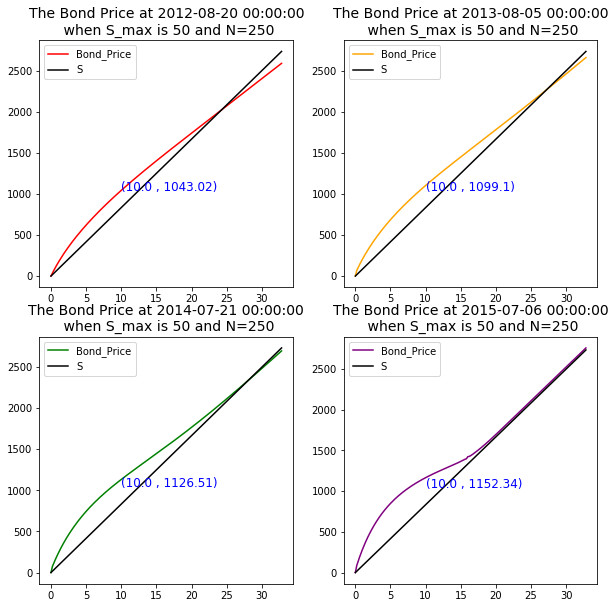

In [21]:
plotting(S,K,T,r, w, Div_S , N ,
         dt, C_rate, Coupon_date, Barrier_Autocall ,
         S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today)

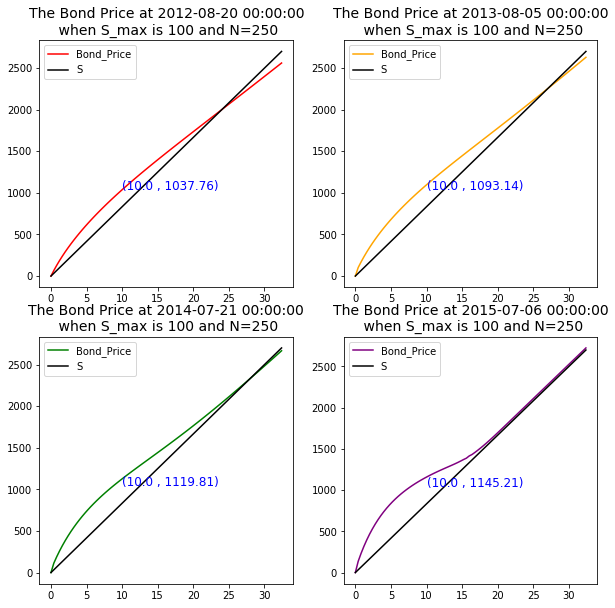

In [22]:
plotting(S,K,T,r, w, Div_S , N ,
         dt, C_rate, Coupon_date, Barrier_Autocall ,
         S_max_times = 10, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today)

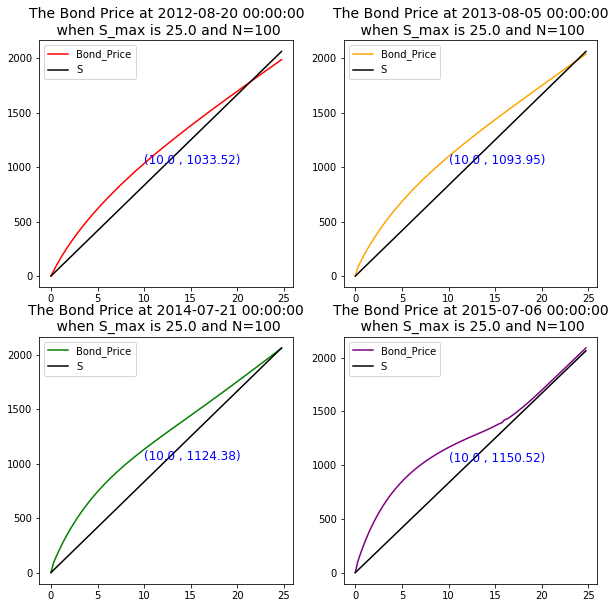

In [23]:
plotting(S,K,T,r, w, Div_S , 100 ,
         dt, C_rate, Coupon_date, Barrier_Autocall ,
         S_max_times = 2.5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today)

 # Q2. When div is 20%

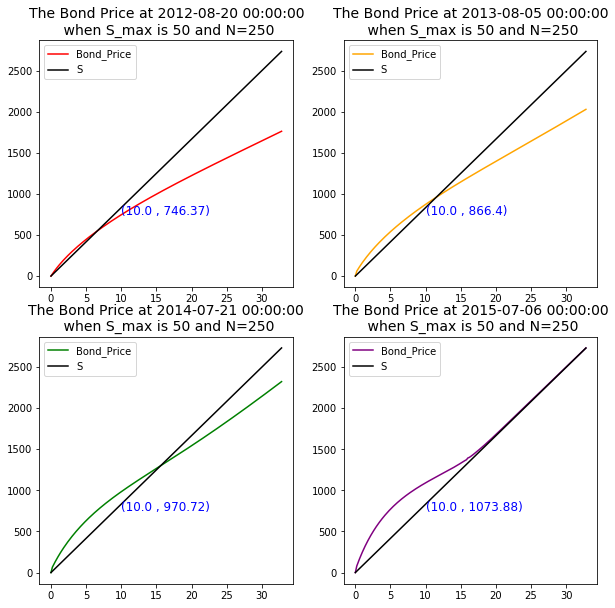

In [24]:
plotting(S,K,T,r, w, 0.2 , N ,
         dt, C_rate, Coupon_date, Barrier_Autocall ,
         S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today)

In [25]:
path = r'MCP.xlsx'

In [26]:
def hedgePF(path, S,K,T,r, w, Div_S , N ,dt, C_rate, Coupon_date, Barrier_Autocall , S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today ) :
    price_data = pd.read_excel(path, index_col = 0)[['Adj Close']]
    price_data.index = pd.to_datetime(price_data.index)
    price_data = price_data.sort_index()
    price_data = price_data['2012-8-20':]

    Data = CB_price(S= S,K= K, T = T,r=r, w=w, Div_S =Div_S, N=N ,dt=dt, C_rate=C_rate, Coupon_date=Coupon_date,
                    Barrier_Autocall =Barrier_Autocall, S_max_times = S_max_times, S_min_times = S_min_times, F = F,
                    compound = compound, ind = ind , today = today)    
    
    CB_data = Data.T
    S_max_times ,S_min_times = S_max_times ,S_min_times
    S_max , S_min = S_max_times * S , S_min_times*S
    n = np.arange(0,N+1)
    dS = (S_max - S_min)/N
    
    Delta_matrix = Data.diff()/dS
    Delta_matrix.iloc[0] = 2*Delta_matrix.iloc[1] - Delta_matrix.iloc[2]
    Delta_matrix = Delta_matrix.T

    index_name = CB_data[:price_data.index[-1]].index
    price_data = price_data.resample('D').last().fillna(method = 'ffill').loc[index_name]

    CB_price_path = []
    CB_delta_path = []
    for n, i in enumerate(price_data['Adj Close']) :
        colum_n = np.abs(i - np.array(CB_data.columns)).argmin()
        CB_price_path.append(CB_data[CB_data.columns[colum_n]].iloc[n])
        CB_delta_path.append(Delta_matrix[Delta_matrix.columns[colum_n]].iloc[n])

    Offered_Price = 1000
    my_pf_data = pd.DataFrame(CB_price_path, index = price_data.index , columns=['CB_price_path'])
    my_pf_data['S'] = price_data['Adj Close']
    my_pf_data['CB_delta_path'] = CB_delta_path
    my_pf_data['Previous_Stock'] = -my_pf_data.CB_delta_path.shift(1).fillna(np.nan)
    my_pf_data['Additional_Stock'] = -my_pf_data.CB_delta_path.diff().fillna(my_pf_data.CB_delta_path.iloc[0])
    my_pf_data['Value_of_Stock'] = -my_pf_data.CB_delta_path * price_data['Adj Close']
    initial_cash = -my_pf_data.Additional_Stock.iloc[0] * price_data['Adj Close'].iloc[0] - Offered_Price
    my_pf_data['Cash_Amount'] = np.r_[[initial_cash] ,np.zeros(len(my_pf_data)-1)]
    for i in range(1,len(my_pf_data)) :
        my_pf_data.Cash_Amount.iloc[i] = ( my_pf_data.Cash_Amount.iloc[i-1] * np.exp(r*dt) +
                                          (-my_pf_data.Additional_Stock.iloc[i] * price_data['Adj Close'].iloc[i]))
    my_pf_data['Cash_Profit_Expense'] = ((my_pf_data.Cash_Amount.shift(1) * np.exp(r*dt)) -
                                         my_pf_data.Cash_Amount.shift(1)).fillna(0)
    my_pf_data['Stock_Profit'] = (my_pf_data.Previous_Stock * price_data['Adj Close'].diff()).fillna(0)
    my_pf_data['CB_Profit'] = my_pf_data.CB_price_path.diff().fillna(0)
    my_pf_data['Stock_Cum_Profit'] = my_pf_data.Stock_Profit.cumsum()
    my_pf_data['CB_Cum_Profit'] = my_pf_data.CB_Profit.cumsum() + (my_pf_data.CB_price_path.iloc[0] - Offered_Price)
    my_pf_data['Cash_Cum_P_E'] = my_pf_data.Cash_Profit_Expense.cumsum()
    my_pf_data['Total_Profit'] = (my_pf_data.Stock_Cum_Profit +
                                  my_pf_data.CB_Cum_Profit +
                                  my_pf_data.Cash_Cum_P_E)
    my_pf_data = my_pf_data.round(3)        
    return my_pf_data

In [27]:
hedgePF(path, S,K,T,r, w, Div_S , N ,dt, C_rate, Coupon_date, Barrier_Autocall , S_max_times = 5, S_min_times = 0, F = 1000, compound = 0.5, ind = True , today = today )

,CB_price_path,S,CB_delta_path,Previous_Stock,Additional_Stock,Value_of_Stock,Cash_Amount,Cash_Profit_Expense,Stock_Profit,CB_Profit,Stock_Cum_Profit,CB_Cum_Profit,Cash_Cum_P_E,Total_Profit
2012-08-20,1043.020,10.02,76.545,NaN,-76.545,-766.986,-233.014,0.000,0.000,0.000,0.000,43.020,0.000,43.020
2012-08-27,1014.002,9.52,77.514,-76.545,-0.969,-737.938,-223.834,-0.045,38.273,-29.018,38.273,14.002,-0.045,52.230
2012-09-03,1165.692,11.51,73.197,-77.514,4.317,-842.497,-273.571,-0.043,-154.254,151.691,-115.981,165.693,-0.088,49.624
2012-09-10,1196.403,11.93,72.489,-73.197,0.708,-864.794,-282.071,-0.053,-30.743,30.710,-146.724,196.403,-0.140,49.539
2012-09-17,1297.824,13.43,70.465,-72.489,2.024,-946.345,-309.307,-0.054,-108.734,101.421,-255.457,297.824,-0.195,42.172
2012-09-24,1170.638,11.59,73.110,-70.465,-2.645,-847.345,-278.711,-0.059,129.656,-127.185,-125.802,170.638,-0.254,44.582
2012-10-01,1128.221,10.98,74.204,-73.110,-1.094,-814.760,-266.753,-0.054,44.597,-42.418,-81.205,128.221,-0.308,46.708
2012-10-08,1144.646,11.11,73.784,-74.204,0.421,-819.735,-271.476,-0.051,-9.647,16.425,-90.851,144.646,-0.359,53.435
2012-10-15,1101.820,10.62,74.970,-73.784,-1.186,-796.181,-258.927,-0.052,36.154,-42.826,-54.697,101.820,-0.411,46.711
2012-10-22,1118.405,10.90,74.515,-74.970,0.454,-812.219,-263.931,-0.050,-20.992,16.585,-75.689,118.405,-0.461,42.255


In [ ]:
my_pf_data.to_excel('P&L_data.xlsx')